In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.0/165.0 kB 16.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pycaret.regression import *

In [3]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [5]:
df = df.iloc[:, 2:]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  17000 non-null  float64
 1   total_rooms         17000 non-null  float64
 2   total_bedrooms      17000 non-null  float64
 3   population          17000 non-null  float64
 4   households          17000 non-null  float64
 5   median_income       17000 non-null  float64
 6   median_house_value  17000 non-null  float64
dtypes: float64(7)
memory usage: 929.8 KB


array([[<Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>],
       [<Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>, <Axes: >,
        <Axes: >]], dtype=object)

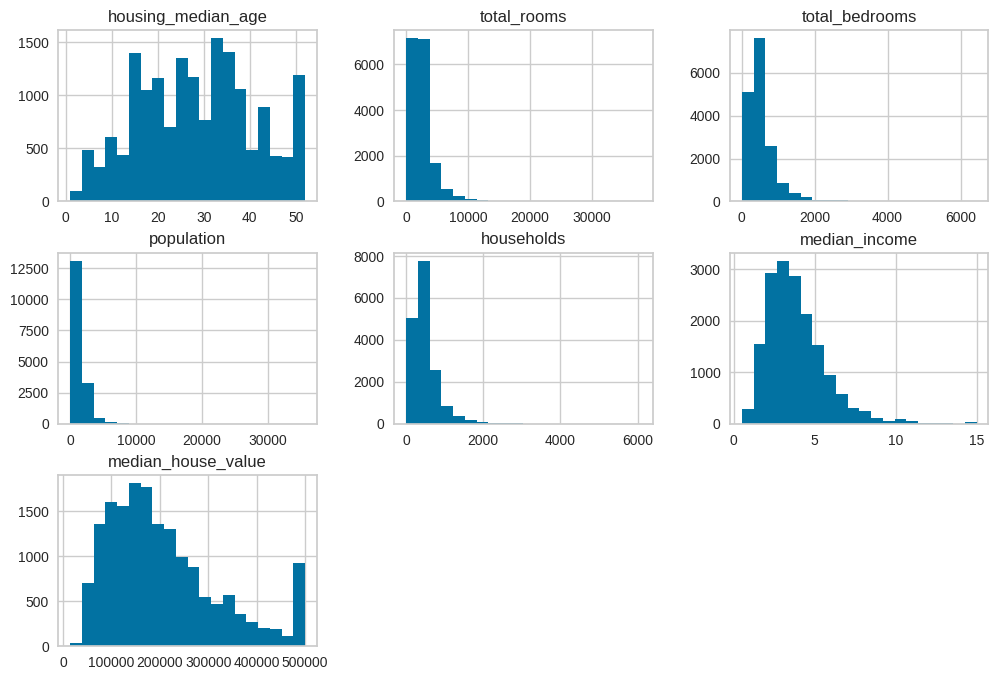

In [6]:
df.hist(bins=20, figsize=(12,8))

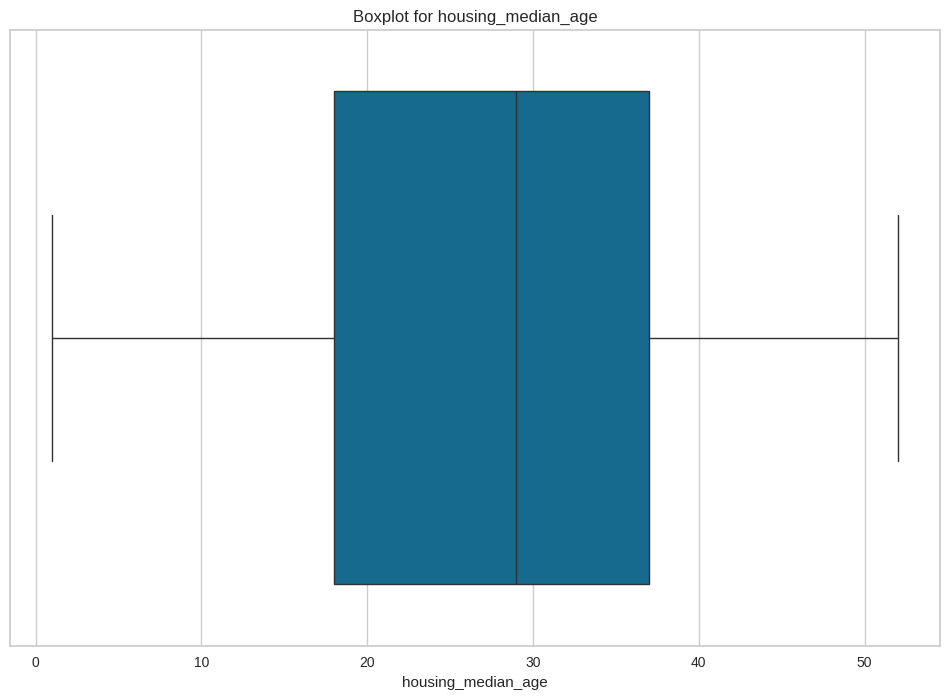

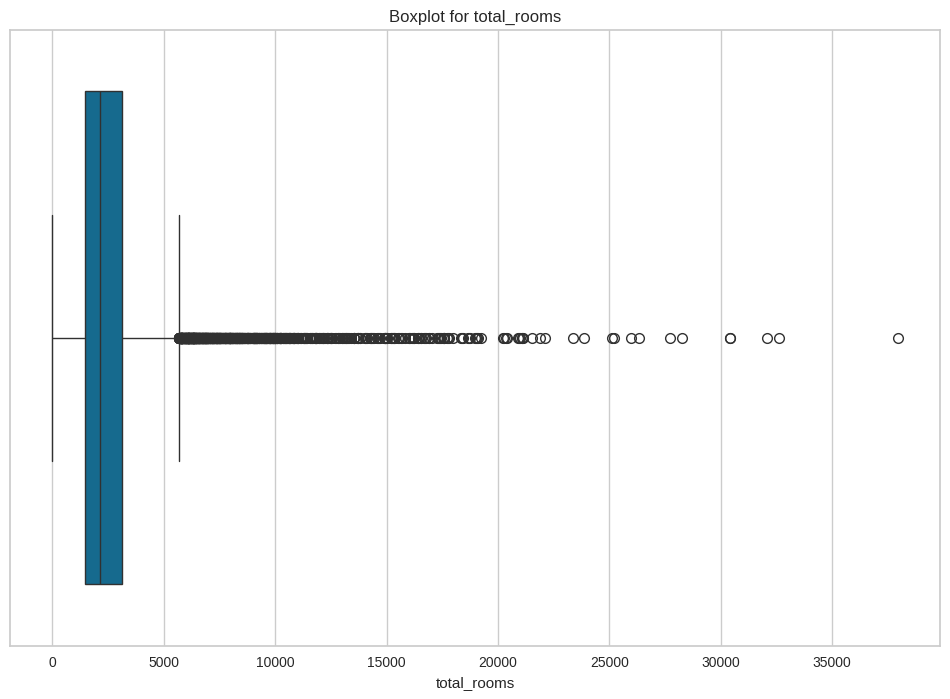

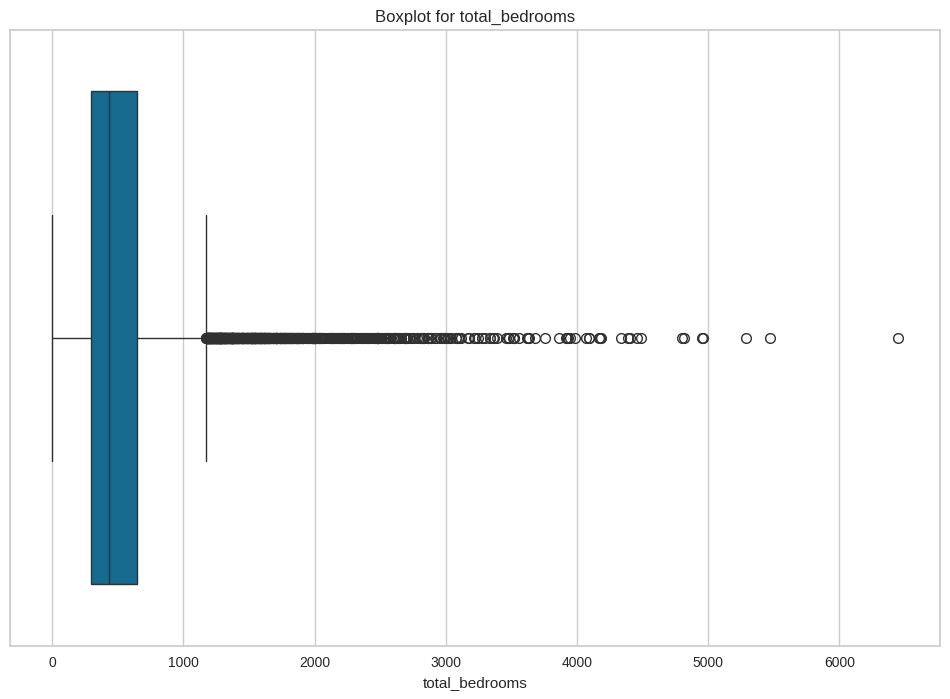

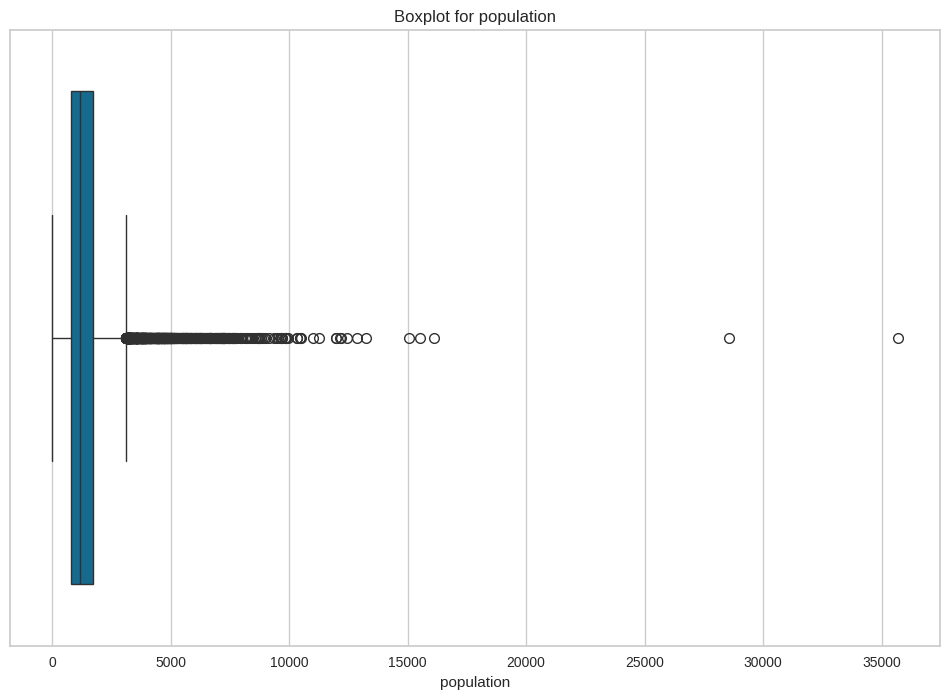

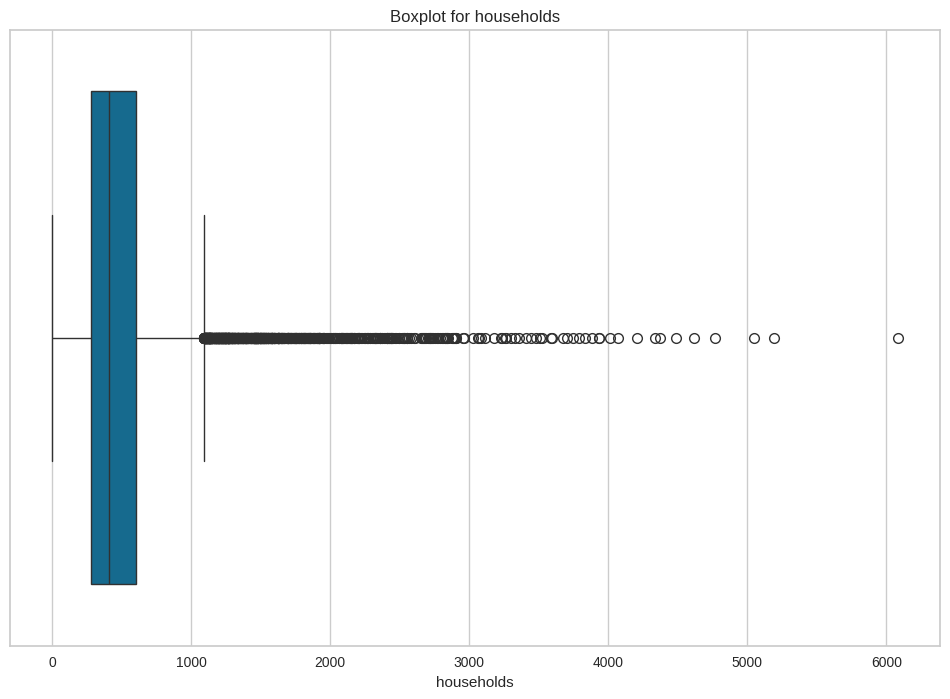

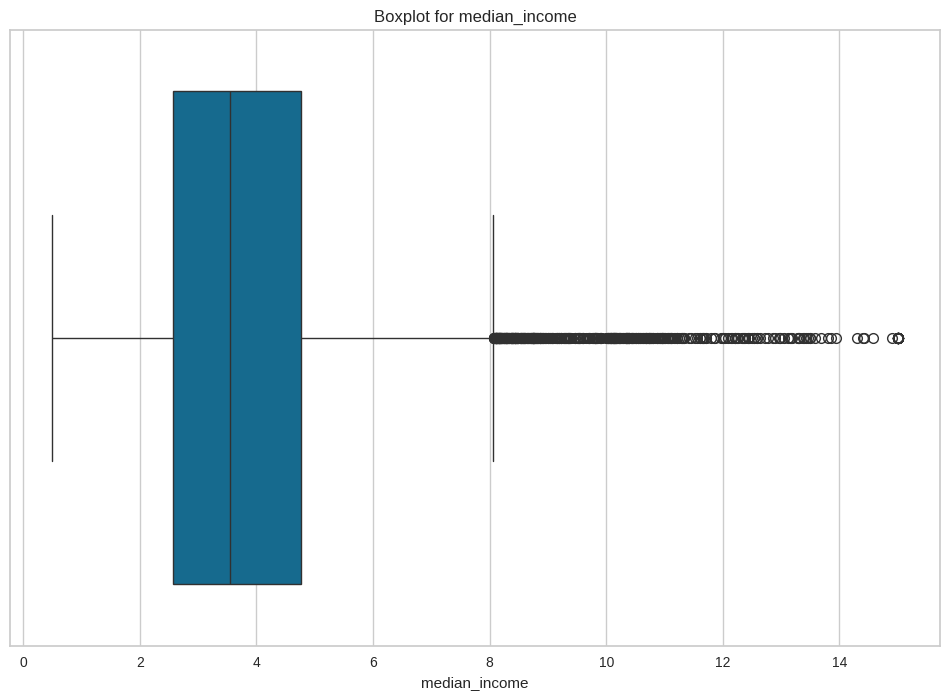

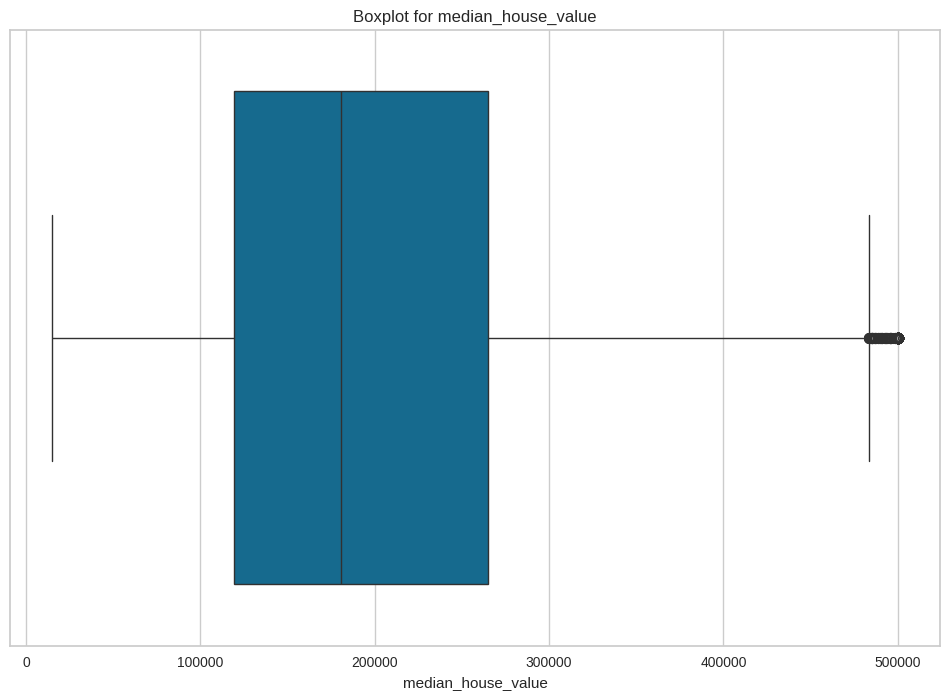

In [7]:
for col in df.columns:
    plt.figure(figsize=(12,8))
    sns.boxplot(x=col, data=df)
    plt.title(f'Boxplot for {col}')
    plt.show()

<Axes: >

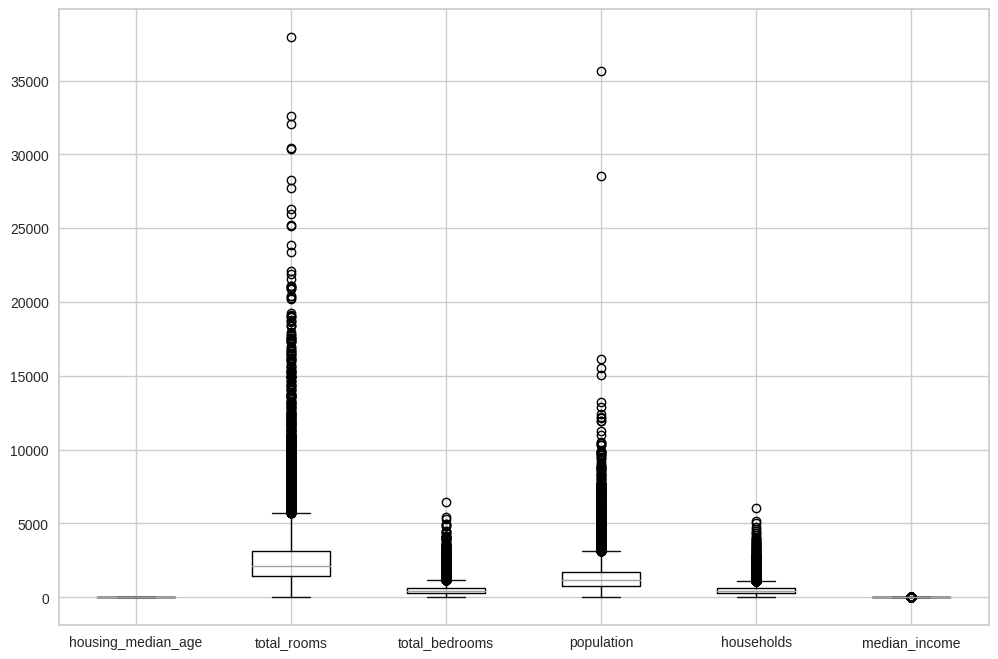

In [8]:
df.iloc[:, :-1].boxplot(figsize=(12,8))

In [9]:
s = setup(data=df,
          target='median_house_value',
          train_size=0.8,
          normalize=True,
          normalize_method='robust',
          session_id = 123)

,Description,Value
0,Session id,123
1,Target,median_house_value
2,Target type,Regression
3,Original data shape,"(17000, 7)"
4,Transformed data shape,"(17000, 7)"
5,Transformed train set shape,"(13600, 7)"
6,Transformed test set shape,"(3400, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [10]:
get_config('X')

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
9013,30.0,2817.0,604.0,1089.0,412.0,3.1364
13722,29.0,4133.0,744.0,2023.0,749.0,5.1616
1024,9.0,1931.0,472.0,1628.0,445.0,2.0850
12966,26.0,2902.0,761.0,2258.0,719.0,2.5663
10944,7.0,4966.0,985.0,2431.0,904.0,3.1042
...,...,...,...,...,...,...
11459,9.0,6169.0,959.0,3378.0,945.0,5.1047
15437,18.0,4026.0,718.0,1731.0,705.0,3.3500
8552,15.0,8510.0,1258.0,3733.0,1233.0,6.1082
14081,16.0,2445.0,469.0,721.0,474.0,2.8043


In [11]:
get_config('X_train_transformed')

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
9013,0.052632,0.398884,0.477401,-0.087420,0.006149,-0.189072
13722,0.000000,1.171978,0.872881,0.908316,1.042275,0.732489
1024,-1.052632,-0.121604,0.104520,0.487207,0.107610,-0.667508
12966,-0.157895,0.448818,0.920904,1.158849,0.950038,-0.448494
10944,-1.157895,1.661331,1.553672,1.343284,1.518832,-0.203725
...,...,...,...,...,...,...
96,-1.000000,-0.616831,-0.655367,-0.680171,-0.642583,0.049054
13435,-1.052632,1.680717,1.240113,1.616205,1.251345,0.309660
7763,0.526316,0.153914,-0.175141,-0.313433,-0.116833,0.993914
15377,0.736842,0.076370,0.008475,-0.021322,0.119908,0.617590


In [12]:
get_config('y')

9013     123500.0
13722    275100.0
1024      92600.0
12966    128900.0
10944    122500.0
           ...   
11459    157900.0
15437    118400.0
8552     253700.0
14081     87500.0
15121    415300.0
Name: median_house_value, Length: 17000, dtype: float32

In [13]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,46667.8229,4160279464.1134,64469.7387,0.6884,0.3417,0.2879,2.5210
rf,Random Forest Regressor,48211.1474,4460667271.1377,66757.2810,0.6659,0.3492,0.2957,8.5630
xgboost,Extreme Gradient Boosting,48626.2102,4514337587.2000,67166.7137,0.6618,0.3543,0.2958,0.2410
et,Extra Trees Regressor,49514.2743,4668808227.0778,68298.6489,0.6502,0.3566,0.3045,3.1320
gbr,Gradient Boosting Regressor,50360.9247,4695131263.9738,68484.7929,0.6486,0.3624,0.3151,2.2920
knn,K Neighbors Regressor,50601.7691,4951054592.0000,70300.5523,0.6295,0.3676,0.3051,0.0670
ridge,Ridge Regression,55697.4004,5669147443.2000,75248.4555,0.5758,0.4005,0.3432,0.0430
br,Bayesian Ridge,55698.5180,5669140787.2000,75248.4188,0.5758,0.4006,0.3432,0.0740
llar,Lasso Least Angle Regression,55696.3852,5669158758.4000,75248.5211,0.5758,0.4005,0.3431,0.0610
lasso,Lasso Regression,55696.3816,5669158707.2000,75248.5203,0.5758,0.4005,0.3431,0.0940


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [14]:
model = create_model('lightgbm', fold = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,45340.2215,3755532286.4911,61282.3979,0.7099,0.3315,0.2820
1,46768.2812,4212653565.3248,64904.9579,0.6827,0.3412,0.2891
2,48525.7570,4692048741.9227,68498.5309,0.6537,0.3540,0.2935
3,46589.1843,4033444877.9357,63509.4078,0.6761,0.3433,0.2932
4,47574.7655,4447865935.6982,66692.3229,0.6876,0.3497,0.2963
5,47349.5980,4243440059.6832,65141.6922,0.6912,0.3336,0.2786
6,45184.6637,4100174388.7204,64032.6041,0.6731,0.3429,0.2806
7,46697.8265,4052494946.5188,63659.2094,0.7073,0.3295,0.2766
8,45682.9990,3860939948.9417,62136.4623,0.7038,0.3490,0.2970


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [15]:
"""param_grid = {
    'num_leaves': [31, 63, 127],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500]
}
tuned_model = tune_model(model, optimize = 'RMSE', fold = 10, custom_grid = param_grid, n_iter = 100)
"""

"param_grid = {\n    'num_leaves': [31, 63, 127],\n    'learning_rate': [0.01, 0.05, 0.1],\n    'n_estimators': [100, 200, 500]\n}\ntuned_model = tune_model(model, optimize = 'RMSE', fold = 10, custom_grid = param_grid, n_iter = 100)\n"

In [16]:
predict_model(model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,47650.3593,4453835269.6747,66737.0607,0.6771,0.3464,0.2908


,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,prediction_label
854,22.0,5016.0,1331.0,3222.0,1196.0,2.1441,135500.0,112251.300500
14194,35.0,4043.0,689.0,1832.0,662.0,5.0761,233200.0,268320.162418
3429,14.0,1562.0,373.0,609.0,328.0,2.3935,125000.0,139590.831579
12331,21.0,4426.0,790.0,1856.0,761.0,4.1000,158300.0,214736.774127
3701,35.0,1891.0,353.0,1093.0,382.0,4.0167,165500.0,171894.830369
...,...,...,...,...,...,...,...,...
11459,9.0,6169.0,959.0,3378.0,945.0,5.1047,157900.0,183449.151964
15437,18.0,4026.0,718.0,1731.0,705.0,3.3500,118400.0,163985.548771
8552,15.0,8510.0,1258.0,3733.0,1233.0,6.1082,253700.0,277641.982218
14081,16.0,2445.0,469.0,721.0,474.0,2.8043,87500.0,161964.888016


In [17]:
# functional API
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

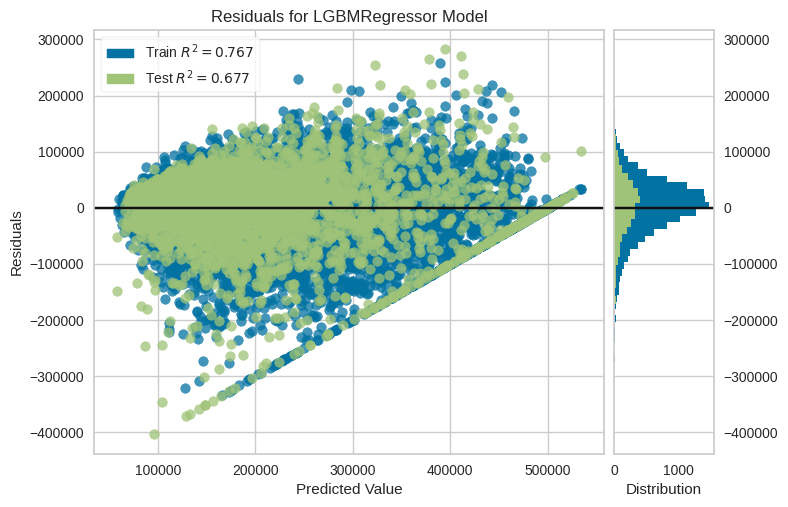

In [19]:
plot_model(model, plot='residuals')

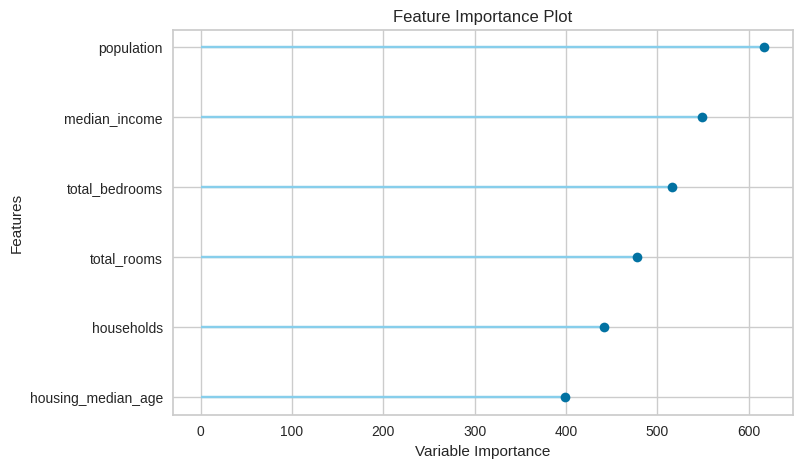

In [20]:
plot_model(model, plot='feature')

In [21]:
save_model(model, 'pycaretregression')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['housing_median_age',
                                              'total_rooms', 'total_bedrooms',
                                              'population', 'households',
                                              'median_income'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=RobustScaler())),
                 ('trained_model', LGBMRegressor(n_jobs=-1, random_state=123))]),
 'pycaretregression.pkl')

In [ ]:
"""df2 = pd.read_csv('/content/sample_data/california_housing_test.csv')
df2 = df2.iloc[:, 2:]
df2 = df2.iloc[:,:-1]
df2"""

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,27.0,3885.0,661.0,1537.0,606.0,6.6085
1,43.0,1510.0,310.0,809.0,277.0,3.5990
2,27.0,3589.0,507.0,1484.0,495.0,5.7934
3,28.0,67.0,15.0,49.0,11.0,6.1359
4,19.0,1241.0,244.0,850.0,237.0,2.9375
...,...,...,...,...,...,...
2995,23.0,1450.0,642.0,1258.0,607.0,1.1790
2996,27.0,5257.0,1082.0,3496.0,1036.0,3.3906
2997,10.0,956.0,201.0,693.0,220.0,2.2895
2998,40.0,96.0,14.0,46.0,14.0,3.2708


In [ ]:
"""predictions = predict_model(model, data=df2)
predictions.head()"""

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,prediction_label
0,27.0,3885.0,661.0,1537.0,606.0,6.6085,387948.626142
1,43.0,1510.0,310.0,809.0,277.0,3.5990,172335.016929
2,27.0,3589.0,507.0,1484.0,495.0,5.7934,263045.088161
3,28.0,67.0,15.0,49.0,11.0,6.1359,241627.414266
4,19.0,1241.0,244.0,850.0,237.0,2.9375,123800.209545


In [ ]:
"""df3 = pd.read_csv('/content/sample_data/california_housing_test.csv')
df3.head()"""

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
